<a href="https://colab.research.google.com/github/yongguang-Zhang/MiCroDential_2022/blob/Mini-Project/MP_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
# Make sure plt graph start from origin point(0,0)
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
import plotly.express as px

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(37638, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
#created a dataframe for NY
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape

(684, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

4361115

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

953601238

##Determining new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
# iterate rows 
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
#created a new column that contains the number of new daily cases
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ny_df.head()

,state,fips,cases,deaths,new_cases,new_deaths
2020-03-01,New York,36,1,0,1,0
2020-03-02,New York,36,1,0,0,0
2020-03-03,New York,36,2,0,1,0
2020-03-04,New York,36,11,0,9,0
2020-03-05,New York,36,22,0,11,0


##Finding new covid19 daily death amount

In [ ]:
dc = []
previuos_d = 0
# iterate rows 
for index, row in ny_df.iterrows():
  current_d = row['deaths']
  newcase_count = current_d - previuos_d
  previuos_d = current_d
  dc.append(newcase_count)

ny_df['new_deaths'] = dc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
338,2020-03-06,New York,36,44,0,22,0
369,2020-03-07,New York,36,89,0,45,0
404,2020-03-08,New York,36,106,0,17,0
440,2020-03-09,New York,36,142,0,36,0
478,2020-03-10,New York,36,173,0,31,0


In [ ]:
ny_df['new_cases'].sum()

4361115

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

In [ ]:
ny_df.dtypes

date          object
state         object
fips           int64
cases          int64
deaths         int64
new_cases      int64
new_deaths     int64
dtype: object

## Find out the change of total case from start to now

In [ ]:
# Format the date
# set up start date
first_day = ny_dates.head(1).values[0]
# set up end date
last_day = ny_dates.tail(1).values[0]
# Create a series to hold date range (from start date to now)
date_range = pd.date_range(first_day,last_day,freq='D')
# set date_range as index of ny_df
ny_df = ny_df.set_index(date_range).drop('date',axis=1)

<Figure size 1080x504 with 0 Axes>

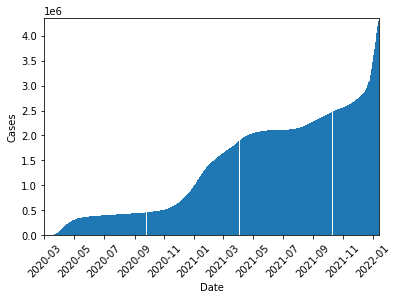

In [ ]:
# Draw graph
plt.figure(figsize=(15,7))
fig,ax = plt.subplots()
ax.bar(ny_df.index,ny_df['cases'],width=1,)
#ax.xaxis_date()
#fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()

## Find out daily changes of new cases

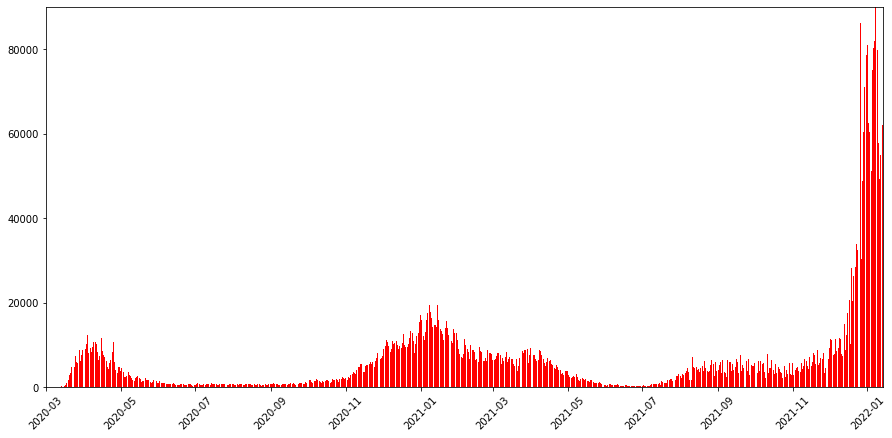

In [ ]:
# Draw Graph
plt.figure(figsize=(15,7))
plt.bar(x=ny_df.index, height=ny_new_cases, color='red')
plt.xticks(rotation=45)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_df

,state,fips,cases,deaths,new_cases,new_deaths
2020-03-01,New York,36,1,0,1,0
2020-03-02,New York,36,1,0,0,0
2020-03-03,New York,36,2,0,1,0
2020-03-04,New York,36,11,0,9,0
2020-03-05,New York,36,22,0,11,0
...,...,...,...,...,...,...
2022-01-09,New York,36,4136861,60083,79777,170
2022-01-10,New York,36,4194745,60162,57884,79
2022-01-11,New York,36,4244155,60428,49410,266
2022-01-12,New York,36,4299066,60638,54911,210


In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df.index[-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
#to pull last 30 days------------made new df to store NY's last 30 days of data
test=ny_df.iloc[-31:-1]
test.shape 

(30, 6)

Draw a graph showing new cases of NY across the last 30 days

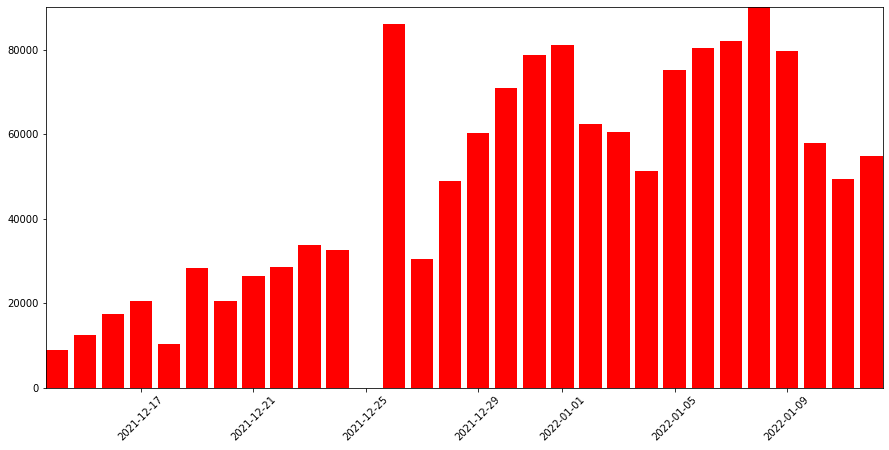

In [ ]:
# Draw a graph about new cases of NY increased in last 30 days
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=45)
plt.show()

(Adaptation)

In [ ]:
px.bar(test, x=test.index,y='new_cases', title="Daily New Case Count in NY (Past 30 Days) ", labels={'x':'Date', 'new_cases':'New Cases'})

#Examine death cases in last 30 days in NY

In [ ]:
# don't really need this since added extra portion above to take care of this earlier.. Count deaths each day

# deaths_count = []
# previous_death = ny_df['deaths'][-32]
# for index,deaths in ny_deaths_30.iteritems():
#   current_death = deaths
#   counts = current_death - previous_death
#   previous_death = current_death
#   deaths_count.append(counts)

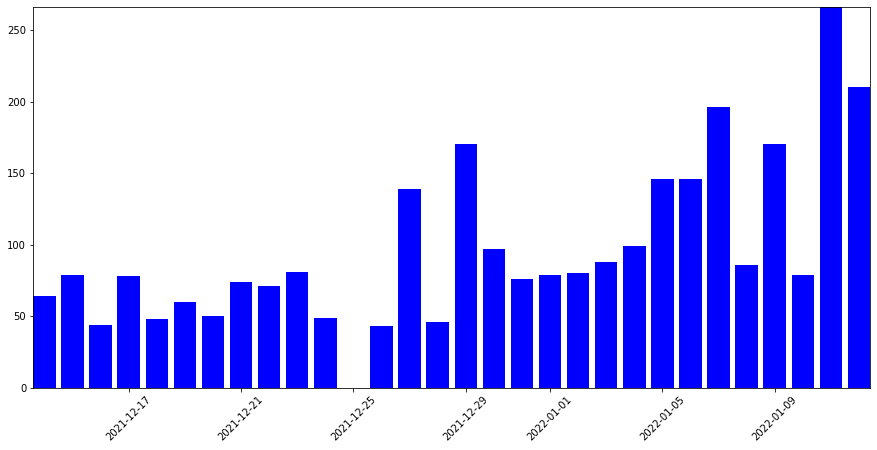

In [ ]:
# Draw a graph about death cases of NY increased in last 30 days 
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=deaths_count, color='blue')
plt.xticks(rotation=45)
plt.show()

(Adaptation)

In [ ]:
px.bar(test, x=test.index,y='new_deaths', title="Daily Death Case Count in NY (Last 30 Days)", labels={'x':'Date', 'new_deaths':'Deaths'})

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

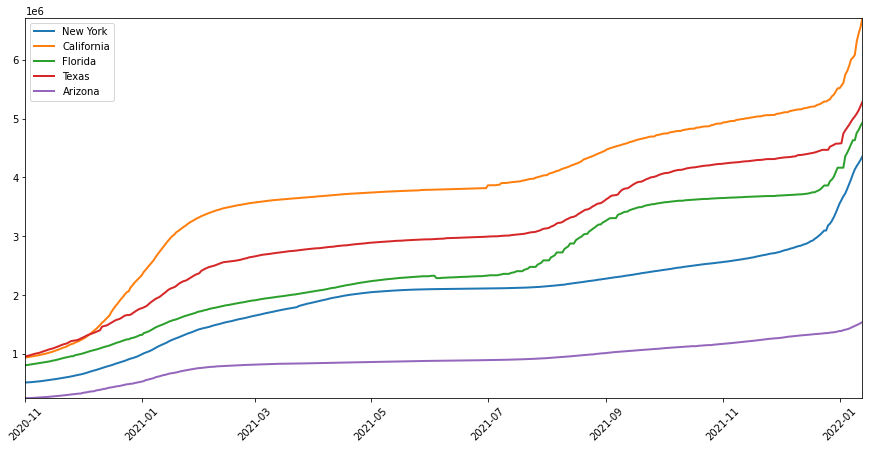

In [ ]:
#Shows the cumulative case trajectory for all 5 states between 2020 and 2022

# Format Date
first_day1 = '2020-11-01'
# set up end date
last_day1 = df.tail(1).values[0][0]
# Create a series to hold date range (from start date to now)
date_range = pd.date_range(first_day1,last_day1,freq='D')
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  df_st.set_index(date_range,inplace=True)
  plt.plot(df_st.index,
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=45)
plt.legend(states)
plt.show()


#Isolate Arizona

In [ ]:
arizona_df = df[df['state']=='Arizona']

In [ ]:
arizona_df.set_index('date', inplace=True)

In [ ]:
arizona_df.head()

,state,fips,cases,deaths
date,,,,
2020-01-26,Arizona,4,1,0
2020-01-27,Arizona,4,1,0
2020-01-28,Arizona,4,1,0
2020-01-29,Arizona,4,1,0
2020-01-30,Arizona,4,1,0


In [ ]:
#new DAILY  cases for AZ
newcase = []
previuos_case = 0
# iterate rows 
for index, row in arizona_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

arizona_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
arizona_df.head()

,state,fips,cases,deaths,new_cases
date,,,,,
2020-01-26,Arizona,4,1,0,1
2020-01-27,Arizona,4,1,0,0
2020-01-28,Arizona,4,1,0,0
2020-01-29,Arizona,4,1,0,0
2020-01-30,Arizona,4,1,0,0


In [ ]:
#Generate column for new deaths (with respect to specific date)
dc = []
previuos_d = 0
# iterate rows 
for index, row in arizona_df.iterrows():
  current_d = row['deaths']
  newcase_count = current_d - previuos_d
  previuos_d = current_d
  dc.append(newcase_count)

arizona_df['new_deaths'] = dc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
arizona_df.head()

,state,fips,cases,deaths,new_cases,new_deaths
date,,,,,,
2020-01-26,Arizona,4,1,0,1,0
2020-01-27,Arizona,4,1,0,0,0
2020-01-28,Arizona,4,1,0,0,0
2020-01-29,Arizona,4,1,0,0,0
2020-01-30,Arizona,4,1,0,0,0


In [ ]:
arizona_df.shape

(719, 6)

In [ ]:
arizona_df=arizona_df.iloc[-31:-1]

In [ ]:
arizona_df.shape #confirms latest 30 days

(30, 6)

#Isolate Texas

In [ ]:
texas_df = df[df['state']=='Texas']
texas_df.set_index('date', inplace=True)

#new daily cases for texas
newcase = []
previuos_case = 0
# iterate rows 
for index, row in texas_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

texas_df['new_cases'] = newcase


dc = []
previuos_d = 0
# iterate rows 
for index, row in texas_df.iterrows():
  current_d = row['deaths']
  newcase_count = current_d - previuos_d
  previuos_d = current_d
  dc.append(newcase_count)

texas_df['new_deaths'] = dc

texas_df=texas_df.iloc[-31:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
texas_df.shape

(30, 6)

#Isolate Florida

In [ ]:
florida_df = df[df['state']=='Florida']
florida_df.set_index('date', inplace=True)

#new daily cases for texas
newcase = []
previuos_case = 0
# iterate rows 
for index, row in florida_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

florida_df['new_cases'] = newcase


dc = []
previuos_d = 0
# iterate rows 
for index, row in florida_df.iterrows():
  current_d = row['deaths']
  newcase_count = current_d - previuos_d
  previuos_d = current_d
  dc.append(newcase_count)

florida_df['new_deaths'] = dc

florida_df=florida_df.iloc[-31:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
florida_df.shape

(30, 6)

#Isolate California

In [ ]:
cali_df = df[df['state']=='California']
cali_df.set_index('date', inplace=True)

#new daily cases for texas
newcase = []
previuos_case = 0
# iterate rows 
for index, row in cali_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

cali_df['new_cases'] = newcase


dc = []
previuos_d = 0
# iterate rows 
for index, row in cali_df.iterrows():
  current_d = row['deaths']
  newcase_count = current_d - previuos_d
  previuos_d = current_d
  dc.append(newcase_count)

cali_df['new_deaths'] = dc

cali_df=cali_df.iloc[-31:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cali_df.shape

(30, 6)

In [ ]:
# ax = test.plot(x='state', y='new_cases', label='New York')
# arizona_df.plot(ax=ax, x='state', y='new_cases', label='Arizona')
# texas_df.plot(ax=ax, x='state', y='new_cases', label='Texas')
# florida_df.plot(ax=ax,x='state', y='new_cases', label='Florida')
# cali_df.plot(ax=ax,x='state', y='new_cases', label='California', xlabel='States', ylabel='New Cases', figsize=(20,10))

# ax.axes.xaxis.set_visible(False)

#Combined State DataFrame

In [ ]:
combined=pd.concat([test, cali_df,arizona_df,texas_df,florida_df],axis=0)

In [ ]:
combined.shape

(150, 6)

In [ ]:
combined.head() 

,state,fips,cases,deaths,new_cases,new_deaths
2021-12-14 00:00:00,New York,36,2867444,57788,8931,64
2021-12-15 00:00:00,New York,36,2879827,57867,12383,79
2021-12-16 00:00:00,New York,36,2897347,57911,17520,44
2021-12-17 00:00:00,New York,36,2917910,57989,20563,78
2021-12-18 00:00:00,New York,36,2928229,58037,10319,48


# Conclusion

In [ ]:
fig=px.line(combined,x=combined.index,y='new_cases', color='state')
fig.show()

Below are the conclusions:
1. Note that this 30 day view window covers peak holiday season. 

2. (Examine the data on Dec.25 for all 5 states): Leading up to, including, and post Dec. 25, we see a sudden standstill in new daily cases, which  makes us wonder if this was potentially due to (1) people not wanting to get tested at the time (2)a lack of open testing facilities (3) a lack of access to testing equipment (4) and other factors. Recall that the shortage of lab technicians might come into question as well, particularly during the holidays.

3. Between Dec.31 and Jan. 6: A drastic increase in the number of daily cases. Worth noting that this was during the new years holiday, where people were more likely to meet in groups.